<a href="https://colab.research.google.com/github/krish-0003/deep-learning-keras-tf-tutorial/blob/master/Transfer_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from keras import activations, Input, Model, models
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten, GlobalAveragePooling2D, GlobalMaxPooling2D, BatchNormalization
from sklearn import metrics
from keras.datasets import cifar10
from keras.utils import to_categorical, plot_model
from keras import optimizers
from keras.applications import Xception
from keras.applications.xception import preprocess_input
import cv2 as cv
from google.colab.patches import cv2_imshow

In [ ]:
!nvidia-smi

Mon Feb 22 09:20:00 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.39       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   50C    P8    31W / 149W |      0MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 11s 0us/step


In [ ]:
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(50000, 32, 32, 3) (50000, 1) (10000, 32, 32, 3) (10000, 1)


In [ ]:
X_train = np.array([cv.resize(i,dsize=(72,72), interpolation=cv.INTER_CUBIC) for i in x_train]).astype('float16')/255.0
X_test = np.array([cv.resize(i,dsize=(72,72), interpolation=cv.INTER_CUBIC) for i in x_test]).astype('float16')/255.0
classes = np.max(y_train) - np.min(y_train)+1
Y_train = to_categorical(y_train,classes)
Y_test = to_categorical(y_test,classes)

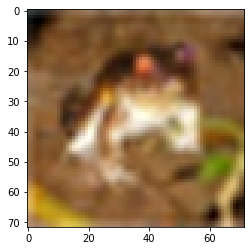

In [ ]:
print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)
print(X_train.dtype, X_test.dtype)

(50000, 72, 72, 3) (50000, 10) (10000, 72, 72, 3) (10000, 10)
float16 float16


In [ ]:
# Try1
#############################
#ip = Input(size=X_train.shape[1::])

learned = Xception(include_top=False, weights='imagenet', input_tensor=Input(shape=(72,72,3)))

for layer in learned.layers:
  layer.trainable = False

top = GlobalAveragePooling2D()(learned.output)

top = BatchNormalization(momentum=0.95)(top)

top = Dropout(0.3)(top)

top = Dense(64, activation='relu')(top)

top = Dropout(0.3)(top)

top = Dense(10, activation='softmax')(top)

model = Model(inputs=learned.input, outputs=top)

83689472/83683744 [==============================] - 1s 0us/step


In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 72, 72, 3)]  0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 35, 35, 32)   864         input_1[0][0]                    
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, 35, 35, 32)   128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, 35, 35, 32)   0           block1_conv1_bn[0][0]            
______________________________________________________________________________________________

In [ ]:
solver = optimizers.Adam(learning_rate=0.0005, name='adam')
model.compile(optimizer=solver, loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
training_data = model.fit(x=X_train, y=Y_train, batch_size=125, epochs=50, validation_data=(X_test, Y_test))

Epoch 1/50
400/400 [==============================] - 92s 206ms/step - loss: 1.6264 - accuracy: 0.4931 - val_loss: 0.8832 - val_accuracy: 0.7035
Epoch 2/50
400/400 [==============================] - 81s 202ms/step - loss: 0.9878 - accuracy: 0.6625 - val_loss: 0.8406 - val_accuracy: 0.7076
Epoch 3/50
400/400 [==============================] - 81s 202ms/step - loss: 0.9087 - accuracy: 0.6867 - val_loss: 0.8108 - val_accuracy: 0.7172
Epoch 4/50
400/400 [==============================] - 81s 202ms/step - loss: 0.8521 - accuracy: 0.7029 - val_loss: 0.7876 - val_accuracy: 0.7250
Epoch 5/50
400/400 [==============================] - 81s 201ms/step - loss: 0.8201 - accuracy: 0.7133 - val_loss: 0.7799 - val_accuracy: 0.7298
Epoch 6/50
400/400 [==============================] - 80s 201ms/step - loss: 0.8095 - accuracy: 0.7181 - val_loss: 0.7751 - val_accuracy: 0.7322
Epoch 7/50
400/400 [==============================] - 81s 201ms/step - loss: 0.7760 - accuracy: 0.7266 - val_loss: 0.7707 - val_ac

In [ ]:
Y_pred = model.predict(X_test).argmax(axis=1)
y_test = Y_test.argmax(axis=1)

In [ ]:
print(metrics.classification_report(y_test, Y_pred))
print(metrics.accuracy_score(y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.74      0.77      0.75      1000
           1       0.84      0.83      0.84      1000
           2       0.77      0.63      0.69      1000
           3       0.63      0.57      0.60      1000
           4       0.64      0.72      0.68      1000
           5       0.70      0.71      0.71      1000
           6       0.70      0.78      0.74      1000
           7       0.81      0.77      0.79      1000
           8       0.83      0.81      0.82      1000
           9       0.80      0.86      0.83      1000

    accuracy                           0.75     10000
   macro avg       0.75      0.75      0.74     10000
weighted avg       0.75      0.75      0.74     10000

0.7452


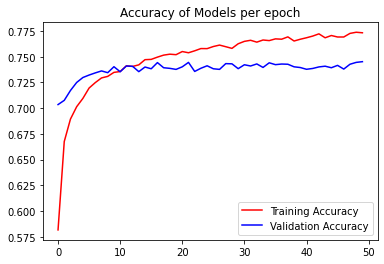

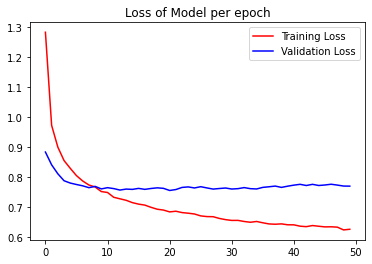

In [ ]:
plt.figure(0)
plt.plot(training_data.history['accuracy'],'r',label='Training Accuracy')
plt.plot(training_data.history['val_accuracy'],'b',label='Validation Accuracy')
plt.legend()
plt.title('Accuracy of Models per epoch')
plt.show()

plt.figure(1)
plt.plot(training_data.history['loss'],'r',label='Training Loss')
plt.plot(training_data.history['val_loss'],'b',label='Validation Loss')
plt.legend()
plt.title('Loss of Model per epoch')
plt.show()


In [ ]:
model.save('lab4_TL', save_format='h5')